# **MÉTODO DE MÍNIMOS CUADRADOS**

A lo largo de los cursos de matemáticas I, se han presentado fórmulas para conceptos tales como la relación de demanda de un producto particular, el costo de fabricar x cantidad de un artículo, el volumen de ventas como una función del gasto en publicidad, funciones de producción, etc. Al considerar ejercicios, se está en la afortunada posición de inventar nuestros propios ejemplos de estas funciones. Sin embargo, en situaciones reales, una empresa no puede inventar su propia función de costo, por ejemplo, si en vez de ello debe determinar esta función a partir de observaciones de sus operaciones.

# **Cuadrados mínimos**
**Ejercicio:** Hallar la recta $y = a x + b$ que mejor aproxima los siguientes datos en el sentido de cuadrados mínimos.

|x|1|2|4|6|
| --- | --- | --- | --- | --- |
|y|3|7|12|15|

a) Utilizando la fórmula 
$$
A^tA a = A^ty
$$
para la matriz $A$ apropiada.

b
) Utilizando polyfit

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1,2,4,6])
y = np.array([3,7,12,15])
len(x)

4

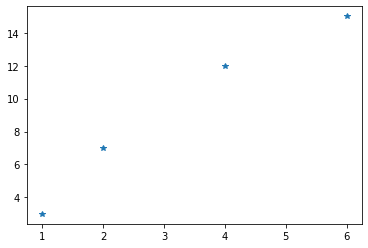

In [ ]:
plt.plot(x,y,'*')
plt.show()

In [ ]:
unos = np.ones(4)
#print(unos)
At = np.array([unos, x])
print('A traspuesta igual\n',At)
A = np.transpose(At)
print('A=\n',A)

A traspuesta igual
 [[1. 1. 1. 1.]
 [1. 2. 4. 6.]]
A=
 [[1. 1.]
 [1. 2.]
 [1. 4.]
 [1. 6.]]


In [ ]:
AtA = np.dot(At, A)
print('Matriz AtA\n',AtA)
Aty = np.dot(At, y)
print('Matriz Aty\n',Aty)

Matriz AtA
 [[ 4. 13.]
 [13. 57.]]
Matriz Aty
 [ 37. 155.]


In [ ]:
a = np.linalg.solve(AtA, Aty)
print(a)
## p = 2.3559 * x + 1.59322
p = np.poly1d([a[1], a[0]])
print(p)

[1.59322034 2.3559322 ]
 
2.356 x + 1.593


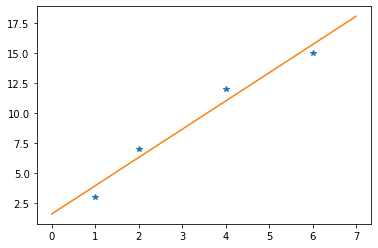

In [ ]:
xi = np.array([1,2,4,6])
yi = np.array([3,7,12,15])
plt.plot(xi,yi,'*')
x = np.linspace(0, 7, 100)
plt.plot(x, p(x))
plt.show()

In [ ]:
c = np.polyfit(xi,yi,1)
print(c)
p2 = np.poly1d(c)
print(p2)

[2.3559322  1.59322034]
 
2.356 x + 1.593


c) Implementar una función **minimosCuadrados** que reciba un vector $x$ y un vector $y$ y devuelva la función lineal $f(x) = ax + b$ (como función de tipo poly1d) que aproxime los datos.

In [ ]:
def minimosCuadrados(x, y):
  
    n = len(x)
    unos = np.ones(n)
    At = np.array([unos, x])
    A = np.transpose(At)
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    s = np.linalg.solve(AtA, Aty)
    p = np.poly1d([s[1], s[0]])
    return (p)

p3 = minimosCuadrados(xi, yi)
print(p3)    

 
2.356 x + 1.593


## **EJERCICIO EN CLASE**

Determine la ecuación de la recta por minimos cuadrados dados por $x_2$ e $y_2$ en la seccion de código que aparece a continuación.

In [ ]:
x2=np.array([1,3,7,9])
y2=np.array([10,7,4,1])
p4 = minimosCuadrados(x2, y2)
print(p4)    

 
-1.05 x + 10.75


## **EJERCICIO EN CLASE**

Determine la ecuación de la recta por minimos cuadrados dados por $u$ e $v$ en la seccion de código que aparece a continuación.

In [ ]:
u=np.array([2,4,6,8])
v=np.array([-10,-6,-4,0])
p5 = minimosCuadrados(u, v)
print(p5)  

 
1.6 x - 13


In [ ]:
#EJERCICIO EN CLASE
u1=np.array([1,2,3,4])
v1=np.array([5,7,9,11])
p6 = minimosCuadrados(u1, v1)
print(p6)  

 
2 x + 3


# **EJERCICIO EN CLASE**

Emplee la funcion minimos cuadrados, para encontrar la mejor curva lineal que ajuste los siguientes datos:

$x =[5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])$

$y =[0, 19, 57, 94, 134, 173, 216, 256, 297, 343, 390])$



In [ ]:
#Escribe código aquí.

x = np.array([5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([0, 19, 57, 94, 134, 173, 216, 256, 297, 343, 390])
p7 = minimosCuadrados(x, y)
print(p7)  

 
4.069 x - 25.41


In [ ]:
#Otra manera de calcular regresiones empleando curve_fit

from scipy import stats as st
from scipy import optimize

x = np.array([5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
y = np.array([0, 19, 57, 94, 134, 173, 216, 256, 297, 343, 390])

optimize.curve_fit(lambda  t,a,b:a*t+b, x, y)

(array([  4.06933045, -25.40712743]),
 array([[ 2.00971741e-03, -1.01399379e-01],
        [-1.01399379e-01,  7.03857852e+00]]))

## **EJEMPLO PRÁCTICO I** 

Leer el archivo casos_coronavirus.csv

a) Graficar la curva de casos por día. 

b) Graficar la curva de casos acumulados.

c) Definir $y$ como el logaritmo de la cantidad de casos acumualdos y calcular la recta que mejor aproxima esos datos.

d) Repetir el punto c) utilizando solo los datos a partir del dia 30.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
uploaded = files.upload()

Saving _5_casos_coronavirus.csv to _5_casos_coronavirus.csv


In [ ]:
datos = pd.read_csv("_5_casos_coronavirus.csv", sep=',')   #dataFrame

In [ ]:
datos

,fecha,confirmados_Nuevos,confirmados_Acumulado
0,3-3-2020,1.0,1.0
1,4-3-2020,0.0,1.0
2,5-3-2020,1.0,2.0
3,6-3-2020,6.0,8.0
4,7-3-2020,0.0,8.0
...,...,...,...
92,3-6-2020,949.0,19268.0
93,4-6-2020,929.0,20197.0
94,5-6-2020,840.0,21037.0
95,6-6-2020,983.0,22020.0


In [ ]:
# Convertimos los datos a np.array
datosNP = datos.to_numpy()
print(datosNP)

[['3-3-2020' 1.0 1.0]
 ['4-3-2020' 0.0 1.0]
 ['5-3-2020' 1.0 2.0]
 ['6-3-2020' 6.0 8.0]
 ['7-3-2020' 0.0 8.0]
 ['8-3-2020' 3.0 12.0]
 ['9-3-2020' 5.0 17.0]
 ['10-3-2020' 2.0 19.0]
 ['11-3-2020' 2.0 21.0]
 ['12-3-2020' 10.0 31.0]
 ['13-3-2020' 3.0 34.0]
 ['14-3-2020' 11.0 45.0]
 ['15-3-2020' 11.0 56.0]
 ['16-3-2020' 9.0 65.0]
 ['17-3-2020' 14.0 79.0]
 ['18-3-2020' 19.0 97.0]
 ['19-3-2020' 31.0 128.0]
 ['20-3-2020' 30.0 158.0]
 ['21-3-2020' 67.0 225.0]
 ['22-3-2020' 41.0 266.0]
 ['23-3-2020' 36.0 301.0]
 ['24-3-2020' 86.0 387.0]
 ['25-3-2020' 117.0 502.0]
 ['26-3-2020' 87.0 589.0]
 ['27-3-2020' 101.0 690.0]
 ['28-3-2020' 55.0 745.0]
 ['29-3-2020' 75.0 820.0]
 ['30-3-2020' 146.0 966.0]
 ['31-3-2020' 88.0 1054.0]
 ['1-4-2020' 79.0 1133.0]
 ['2-4-2020' 132.0 1265.0]
 ['3-4-2020' 88.0 1353.0]
 ['4-4-2020' 98.0 1451.0]
 ['5-4-2020' 103.0 1554.0]
 ['6-4-2020' 74.0 1628.0]
 ['7-4-2020' 87.0 1715.0]
 ['8-4-2020' 80.0 1795.0]
 ['9-4-2020' 99.0 1894.0]
 ['10-4-2020' 81.0 1975.0]
 ['11-4-2020' 167.

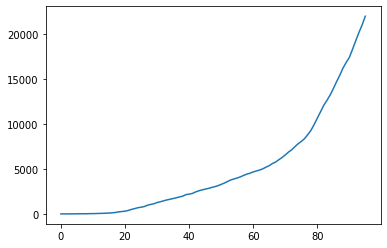

In [ ]:
x = np.arange(97)
#print(x)
plt.plot(x, datosNP[:,2])
plt.show()

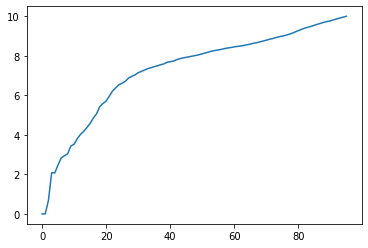

In [ ]:
y = np.log(np.float64(datosNP[:,2]))
#print(y)
plt.plot(x,y)
plt.show()

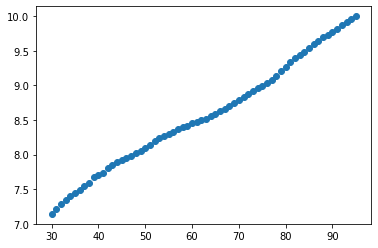

In [ ]:
x30 = x[30:96]
y30 = y[30:96]
plt.plot(x30, y30,'o')
plt.show()

 
0.0412 x + 5.999


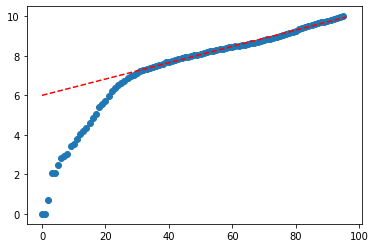

In [ ]:
p = minimosCuadrados(x30, y30)
plt.plot(x, y,'o')
plt.plot(x, p(x),'r--')
print(p)

### **Ejercicio en clase**

Emplear la función minimos cuadrados para encontrar la mejor curva de ajuste a los datos dados la siguiente tabla

$x=[17,19,20,22,23,25,28,31,32,33,36,37,38,39,41]$

$y=[19,25,32,51,57,71,113,141,123,187,192,205,252,259,294]$

Escribe la mejor represetacion $y=ax^b$ de estos datos empleando curve_fit.

In [ ]:
x=[17,19,20,22,23,25,28,31,32,33,36,37,38,39,41]
y=[19,25,32,51,57,71,113,141,123,187,192,205,252,259,294]
optimize.curve_fit(lambda  x,c1,c2:c1*x**c2,x, y)

(array([0.00749076, 2.85013312]), array([[ 1.85229232e-05, -6.86821988e-04],
        [-6.86821988e-04,  2.55014793e-02]]))

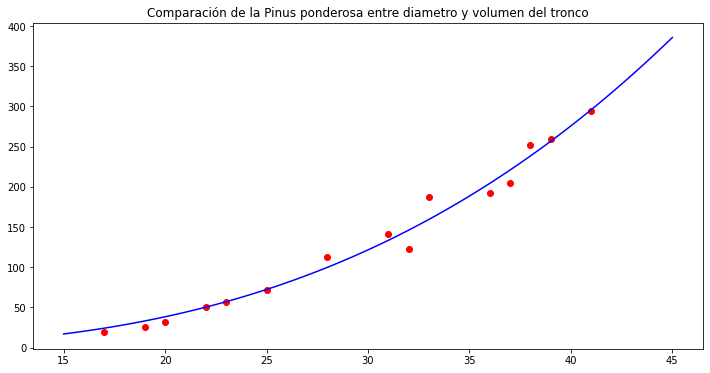

In [ ]:
t=np.linspace(15,45,100)

plt.figure(figsize=(12,6))
plt.plot(x,y,'ro',label="Diametro-Volumen")
plt.plot(t,0.00749076*t**2.85013312,'b-')
plt.title("Comparación de la Pinus ponderosa entre diametro y volumen del tronco")
plt.show()

# **Mínimos cuadrados para sumas de funciones**

Para datos $(t_j, y_j)$, $1 \le j \le m$ queremos ajustar una función del tipo 
$$
y = c_1 f_1(t) + \dots + c_s f_s(t)
$$

Ejemplo: $y = a + b t + c t^2$.

RECORDAR: reemplazando los valores de $t$ e $y$ por los datos en la tabla obtenemos un sistema **lineal** de ecuaciones, donde las incógnitas son los $c_i$:

$$
\begin{align}
y_1 &= c_1 f_1(t_1) + \dots + c_s f_1(t_s) \\
&\vdots\\
y_m &= c_1 f_m(t_1) + \dots + c_s f_m(t_s)
\end{align}
$$

Cuando tenemos más datos (ecuaciones) que incógnitas, usamos mínimos cuadrados para obtener una solución aproximada.



## **EJERCICIO EN CLASE**
a) Implementar una función que reciba un vector $t \in R^m$, un vector $y \in R^m$ y funciones $F = (f_1, \dots, f_s)$ y devuelva el vector de coeficientes $(c_1, \dots, c_s)$ que mejor ajusta la ecuación $y = a_1 f_1(t) + \dots + a_s f_s(t)$ en el sentido de mínimos cuadrados.

b) Utilizar la función implementada para ajustar una función del tipo
$$
y = c_1 t^2 + c_2 e^t + c_3 t
$$
a los datos

|t|1|2|4|6|8|
| --- | --- | --- | --- | --- | --- |
|y|6|10|10|8|10|

In [ ]:
#a) Hacemos primero un programa para construir la matriz A
import numpy as np
import matplotlib.pyplot as plt

# F = [f1, f2, ..., fs]
def matrizAF(t, F):
    s = len(F)
    m = len(t)
    A = np.zeros((m,s))
    for i in range(s):
        A[:,i] = F[i](t)
    return(A)

In [ ]:
# Lo probamos con las funciones del ejercicio
def f1(t):
    return(t**2)

def f2(t):
    return(np.e**t)

def f3(t):
    return(t)

F = [f1, f2, f3]
ti = np.array([1, 2, 4, 6, 8])
yi = np.array([6, 10, 10, 8, 10])

A = matrizAF(ti, F)
print(A)

[[1.00000000e+00 2.71828183e+00 1.00000000e+00]
 [4.00000000e+00 7.38905610e+00 2.00000000e+00]
 [1.60000000e+01 5.45981500e+01 4.00000000e+00]
 [3.60000000e+01 4.03428793e+02 6.00000000e+00]
 [6.40000000e+01 2.98095799e+03 8.00000000e+00]]


In [ ]:
# Usamos el programa anterior para resolver el problema de mínomos cuadrados
# Resolvemos At * A * c = At * y
def solveMinCuad(A, y):
    At = np.transpose(A)
    AtA = np.dot(At, A)
    Aty = np.dot(At, y)
    c = np.linalg.solve(AtA, Aty)
    return(c)

c = solveMinCuad(A, yi)
print(c)

[-9.37735395e-01  6.16733396e-03  6.46005171e+00]


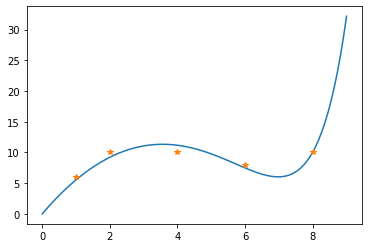

In [ ]:
# Verificamos gráficamente
t = np.linspace(0, 9, 100)
y = c[0]*f1(t) + c[1]*f2(t) + c[2]*f3(t)
plt.plot(t, y)
plt.plot(ti, yi,'*')
plt.show()

In [ ]:
optimize.curve_fit(lambda  x,c1,c2,c3:c1*x**2+c2*np.exp(x)+c3*x,ti, yi)

(array([-9.37735387e-01,  6.16733388e-03,  6.46005167e+00]),
 array([[ 1.73562694e-02, -1.64440985e-04, -7.88760941e-02],
        [-1.64440985e-04,  1.93811537e-06,  6.64042785e-04],
        [-7.88760941e-02,  6.64042785e-04,  3.86891911e-01]]))

c) Repetir para una función de la forma
$$
y = c_1 + c_2 t^2 + c_3 \sin(t)
$$

In [ ]:
# Lo probamos con las funciones del ejercicio
def f1(t):
    return(1)

def f2(t):
    return(t**2)

def f3(t):
    return(np.sin(t))

F = [f1, f2, f3]
ti = np.array([1, 2, 4, 6, 8])
yi = np.array([6, 10, 10, 8, 10])

A = matrizAF(ti, F)
print(A)

[[ 1.          1.          0.84147098]
 [ 1.          4.          0.90929743]
 [ 1.         16.         -0.7568025 ]
 [ 1.         36.         -0.2794155 ]
 [ 1.         64.          0.98935825]]


In [ ]:
c = solveMinCuad(A, yi)
print(c)

[ 8.29044708  0.0258294  -0.33898073]


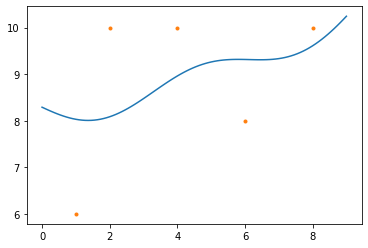

In [ ]:
# Verificamos gráficamente
t = np.linspace(0, 9, 100)
y = c[0]*f1(t) + c[1]*f2(t) + c[2]*f3(t)
plt.plot(t, y)
plt.plot(ti, yi, '.')
plt.show()

## **EJEMPLO PRÁCTICO II**
Estimar por mínimos cuadrados la amplitud $A$ y la fase $\phi$ de la oscilación
$$
b(t) = A \sin(2t + \phi)
$$
a partir de los datos en el archivo oscilacion.csv.

Sugerencia: linealizar la función $b(t)$ usando la identidad trigonométrica
$$
\sin(A + B) = \sin(A) \cos(B) + \cos(A) \sin(B)
$$
y los reemplazos:
$$
\alpha = A \cos(\phi), \quad \beta = A \sin(\phi)
$$

**Resolución.** Linealizamos la función:
$$
b(t) = A (\sin(2t)\cos(\phi) + \cos(2t)\sin(\phi)) = A \cos(\phi) (\sin(2t))  + A \sin(\phi) \cos(2t)
$$
y llamando $\alpha = A \cos(\phi)$ y $\beta = A \sin(\phi)$ obtenemos el problema:
$$
b(t) = \alpha \sin(2t) + \beta \cos(2t)
$$
que está en la forma buscada tomando $f_1(t) = \sin(2t)$ y $f_2(t) = \cos(2t)$.


In [ ]:
uploaded = files.upload()

Saving _5_oscilaciones.csv to _5_oscilaciones.csv


In [ ]:
import pandas as pd   
datos = pd.read_csv("_5_oscilaciones.csv",sep=',')

In [ ]:
datos

,t,y
0,0.000000,3.611498
1,0.698132,4.572438
2,1.396263,-1.736084
3,2.094395,-4.722803
4,2.792527,0.437818
5,3.490658,5.391944
6,4.188790,1.622771
7,4.886922,-4.263802
8,5.585054,-2.720692
9,6.283185,3.899391


[[ 0.          3.61149776]
 [ 0.6981317   4.57243811]
 [ 1.3962634  -1.73608397]
 [ 2.0943951  -4.7228027 ]
 [ 2.7925268   0.43781814]
 [ 3.4906585   5.39194443]
 [ 4.1887902   1.62277136]
 [ 4.88692191 -4.26380204]
 [ 5.58505361 -2.72069187]
 [ 6.28318531  3.89939086]]


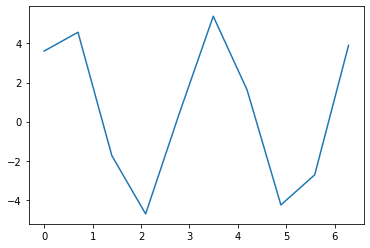

In [ ]:
datosNP = datos.to_numpy()
print(datosNP)

ti = datosNP[:,0]
yi = datosNP[:,1]
plt.plot(ti, yi)
plt.show()

In [ ]:
# Definimos las funciones y construimos la matriz A

def f1(t):
    return(np.sin(2*t))

def f2(t):
    return(np.cos(2*t))

F = [f1, f2]

A = matrizAF(ti, F)
print(A)

[[ 0.00000000e+00  1.00000000e+00]
 [ 9.84807753e-01  1.73648179e-01]
 [ 3.42020146e-01 -9.39692620e-01]
 [-8.66025401e-01 -5.00000004e-01]
 [-6.42787615e-01  7.66044439e-01]
 [ 6.42787604e-01  7.66044448e-01]
 [ 8.66025409e-01 -4.99999992e-01]
 [-3.42020152e-01 -9.39692618e-01]
 [-9.84807752e-01  1.73648185e-01]
 [ 5.64082776e-09  1.00000000e+00]]


In [ ]:
# Hallamos los coeficientes
c = solveMinCuad(A, yi)
print(c)

[3.71705349 3.542975  ]


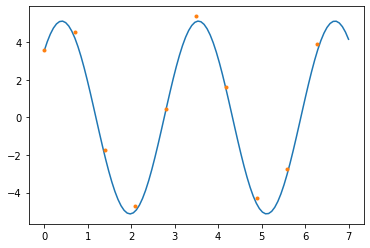

In [ ]:
# Graficamos
t = np.linspace(0, 7, 100)
y = c[0]*f1(t) + c[1]*f2(t)
plt.plot(t, y)
plt.plot(ti, yi, '.')
plt.show()

## **Ejercicio:**

Calcular los valores de $A$ Y $\phi$.

In [ ]:
#Escribe aqui.
phi=np.arctan(c[1]/c[0])

In [ ]:
print(phi)

0.7614250970470376


In [ ]:
A=np.sqrt(c[0]**2+c[1]**2)

In [ ]:
print(A)

5.135090898805702


In [ ]:
#Con curve fit
from scipy import stats as st
from scipy import optimize

In [ ]:
#Con curve fit
optimize.curve_fit(lambda  x,a,b:a*np.sin(2*x+b) ,t, y)

(array([5.1350909, 0.7614251]), array([[ 3.60085154e-32, -9.84366981e-35],
        [-9.84366981e-35,  1.57029354e-33]]))

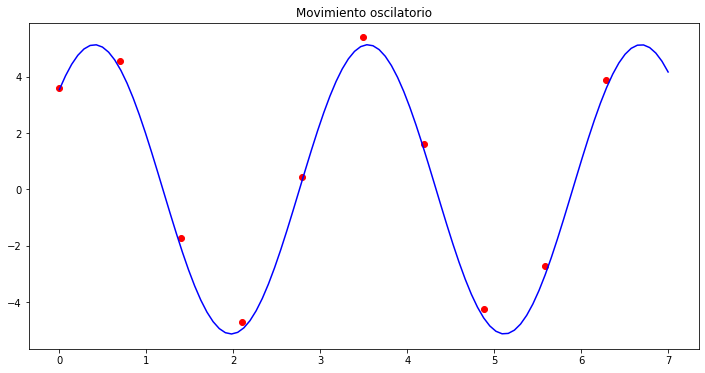

In [ ]:
x=np.linspace(0,7,100)

plt.figure(figsize=(12,6))
plt.plot(ti,yi,'ro',label="tiempo-oscilación")
plt.plot(x,5.1350909*np.sin(2*x+0.7614251),'b-')
plt.title("Movimiento oscilatorio")
plt.show()